<a href="https://colab.research.google.com/github/lima-breno/time_series/blob/main/TS_03_Estacionarias_ARMApassageiros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Séries temporais estacionárias: ARMA

Este notebook busca uma série temporal de um arquivo escolhido e faz algumas análises preliminares, bem como a aplicação dos modelos de previsão autorregressivos de média móvel.

Data da última atualização: 17/02/2025

#### Preliminares

In [1]:
# Carregamento das bibliotecas

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
# Ajuste das preferências gráficas

plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#FFFFFF',    # Cor da moldura
    'axes.facecolor': '#FFFFFF',      # Cor do fundo
    'savefig.facecolor':'#000000',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': True,
    'grid.color': '#888888',
    'grid.linewidth': '0.1',
    'text.color': '#000000',
    'axes.labelcolor': '#000000',
    'xtick.color': '#000000',
    'ytick.color': '#000000',
    'font.size': 12 }
plt.rcParams.update(dark_style)

from pylab import rcParams
rcParams['figure.figsize'] = (21,13)

#### Carregamento da Série Temporal

In [3]:
# Leitura do arquivo de dados

MinhaSerieTemporal = pd.read_csv('Passageiros.csv', index_col = 0)

In [4]:
# Exibição do DataFrame

MinhaSerieTemporal

,Passageiros (milhares)
Mês,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [5]:
# Ajuste do índice para formato DateTime

MinhaSerieTemporal.index = pd.to_datetime(MinhaSerieTemporal.index)

<Axes: xlabel='Mês'>

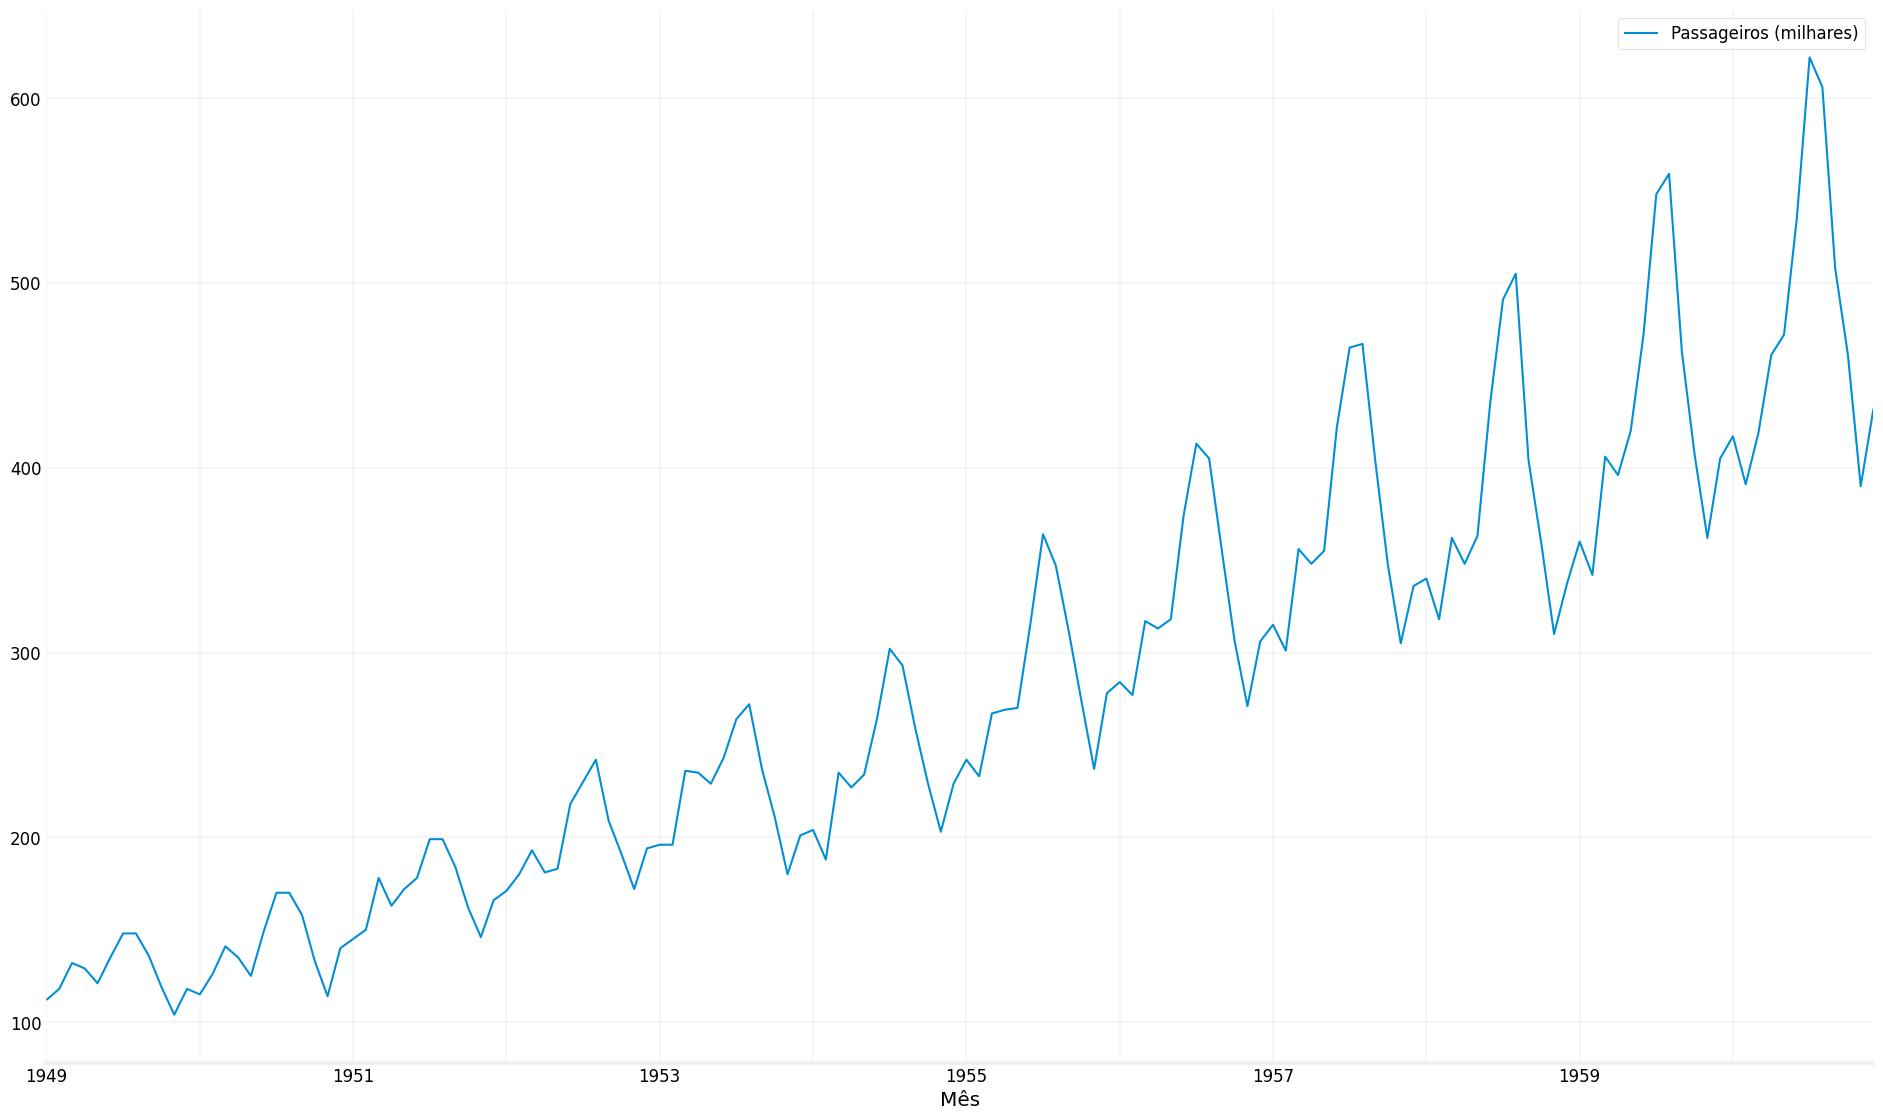

In [6]:
# Gráfico
MinhaSerieTemporal.plot()

#### Decomposição da Série

In [7]:
# Decomposição aditiva da série temporal

PeriodoSazonal = 12     # Sazonalidade anual

Decomposicao = seasonal_decompose(MinhaSerieTemporal[MinhaSerieTemporal.columns[0]], model = "add", period = PeriodoSazonal)

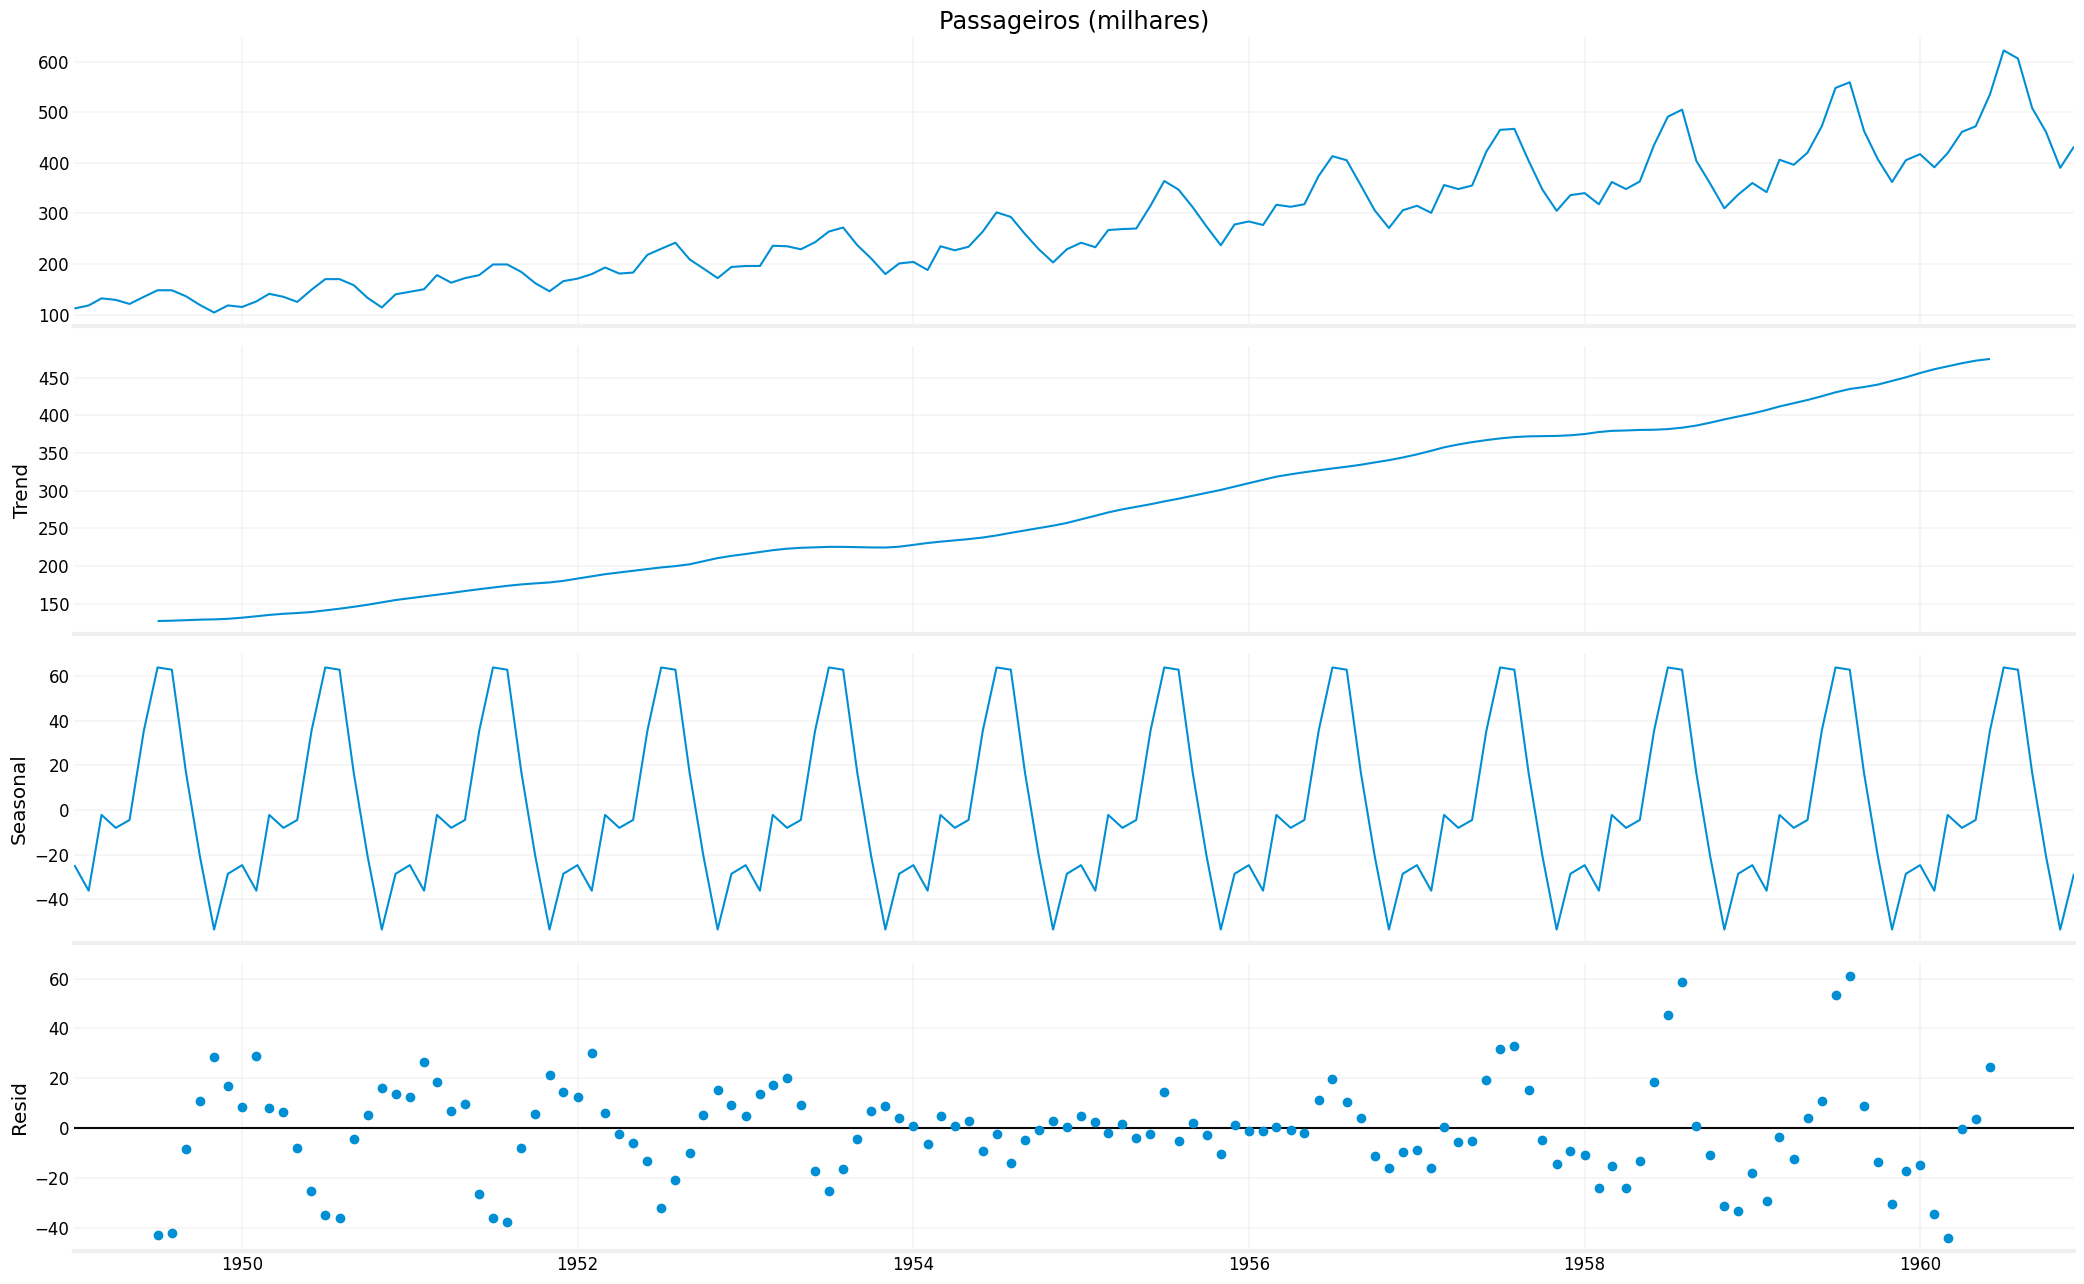

In [8]:
Decomposicao.plot();

#### Teste ADF

In [9]:
# Teste ADF para estacionariedade

ad_fuller_result = adfuller(MinhaSerieTemporal[MinhaSerieTemporal.columns[0]])

print(f'Estatística ADF: {ad_fuller_result[0]:2.4f}')
print(f'p-value:         {ad_fuller_result[1]*100: 2.4f} %')

Estatística ADF: 0.8154
p-value:          99.1880 %


In [10]:
# Teste ADF para estacionariedade para a série das diferenças finitas de ordem escolhida

OrdemDif = 1

ad_fuller_result = adfuller(np.diff(MinhaSerieTemporal[MinhaSerieTemporal.columns[0]], n = OrdemDif))

print(f'Estatística ADF: {ad_fuller_result[0]:2.4f}')
print(f'p-value:         {ad_fuller_result[1]*100: 2.4f} %')

#Aqui devo alterar a ordemDif para que ela fique estacionaria (p-valor menor que 5% e o outro valor menor que 0)

Estatística ADF: -2.8293
p-value:          5.4213 %


#### Funcão de autocorrelação

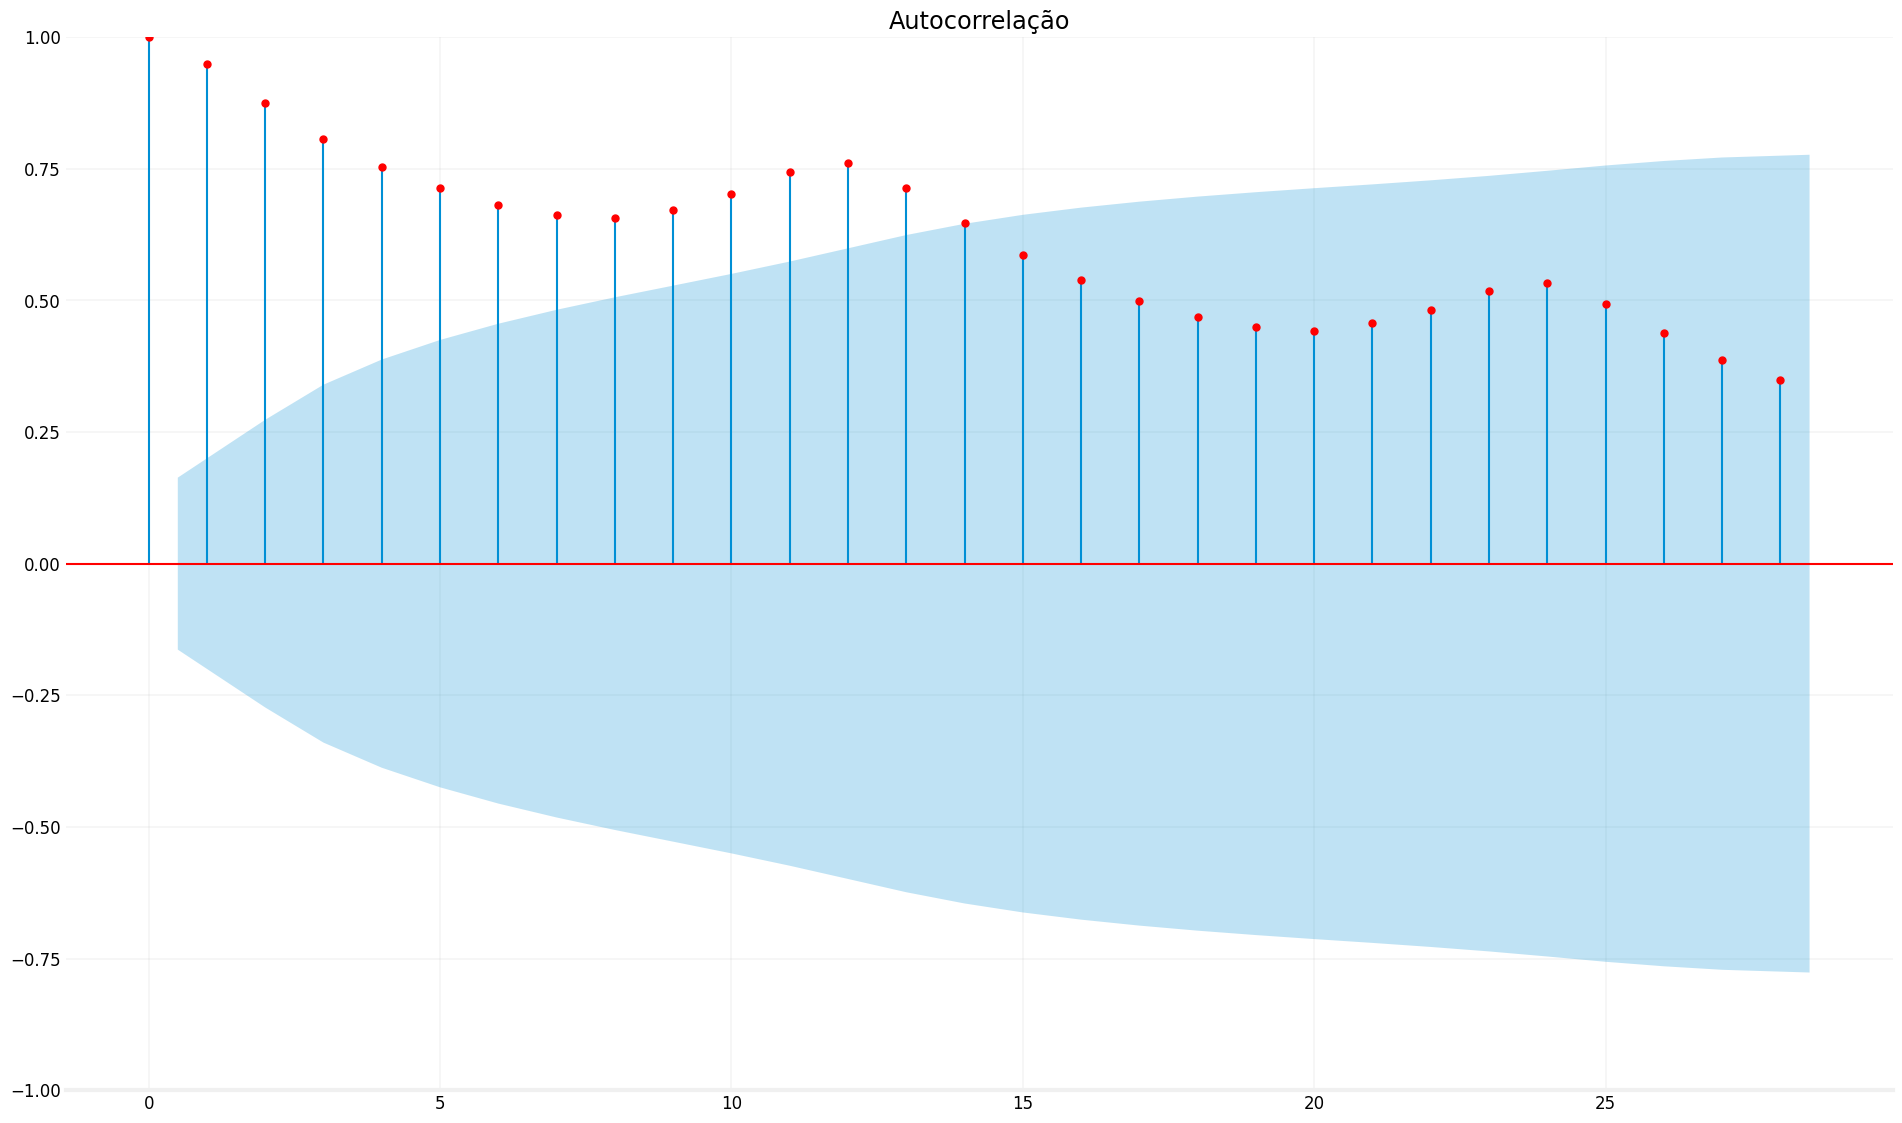

In [11]:
# Função de correlação para série temporal

plot_acf(MinhaSerieTemporal[MinhaSerieTemporal.columns[0]],  lags=28, title = "Autocorrelação", color="red");

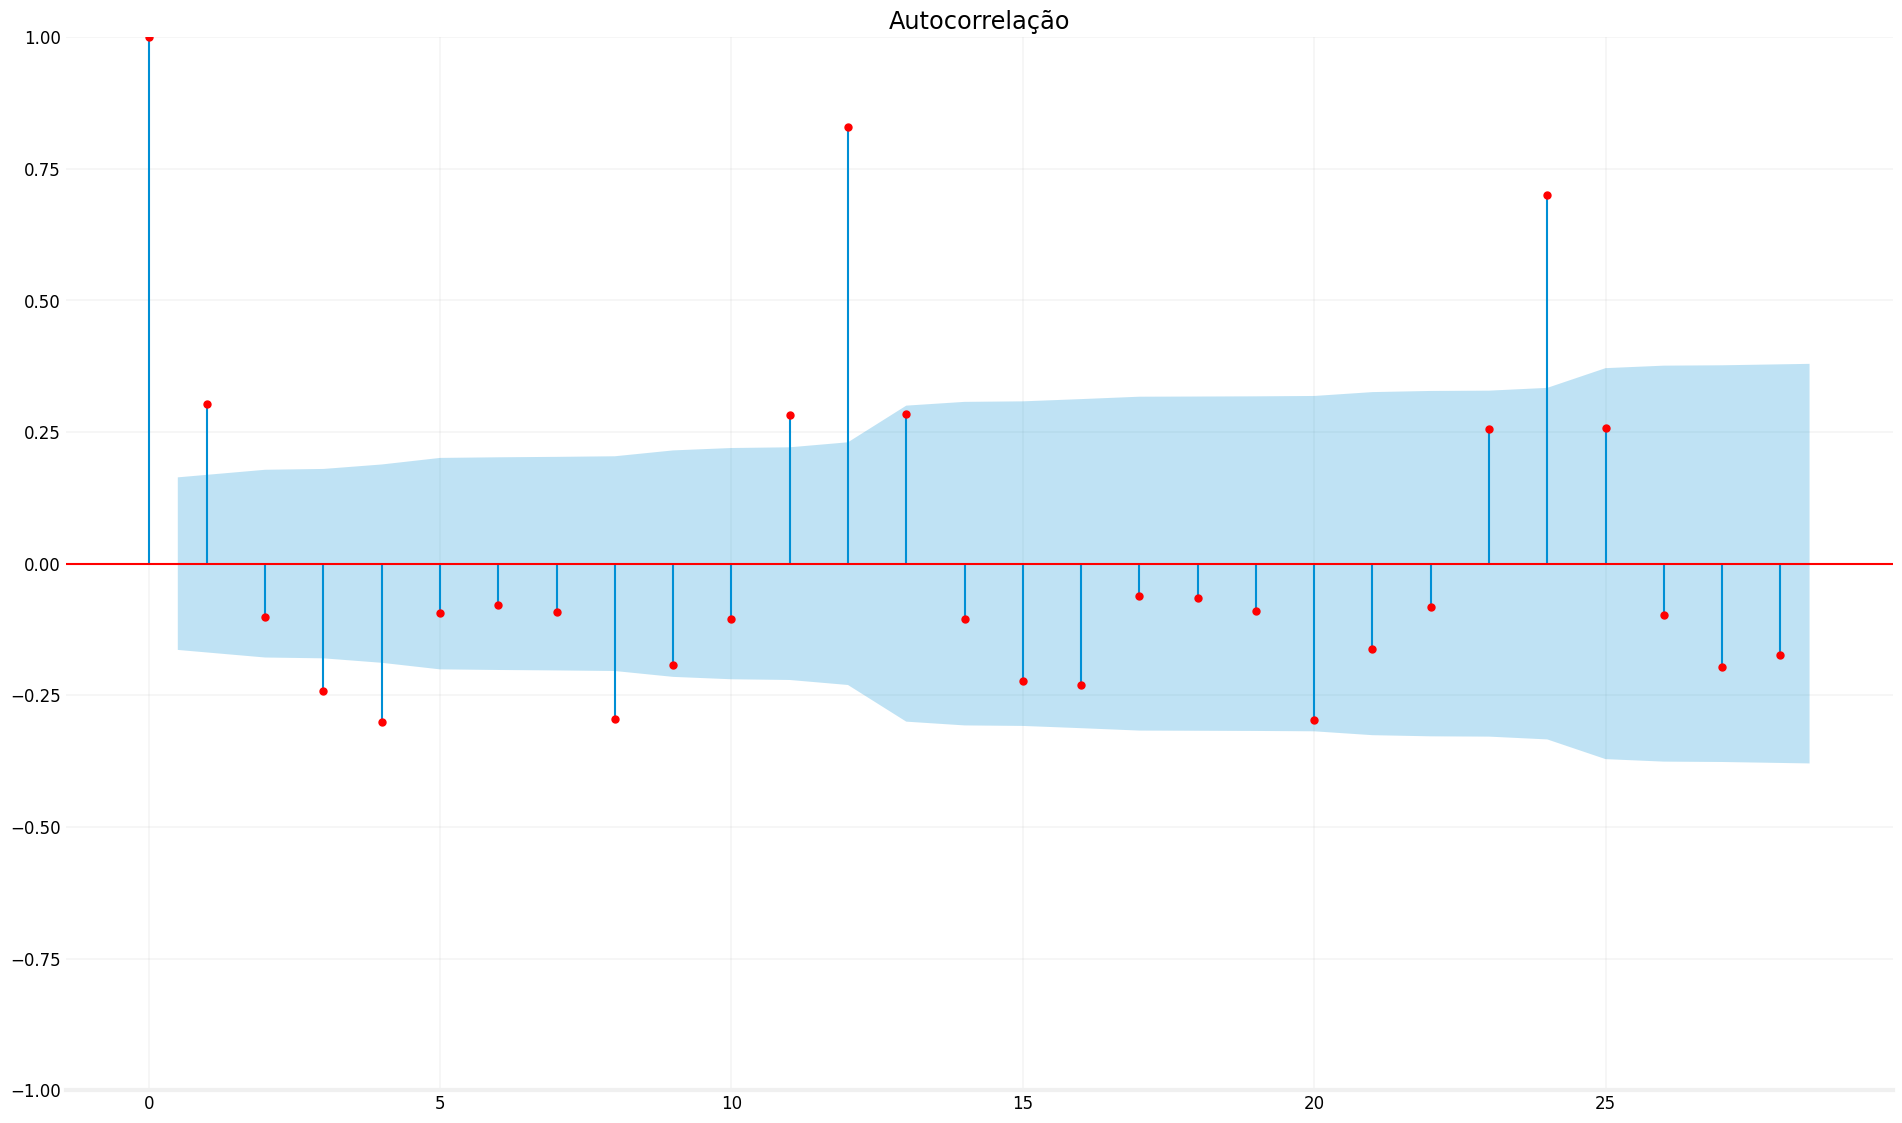

In [12]:
# Função de correlação para série das diferenças finitas da ordem escolhida acima

plot_acf(np.diff(MinhaSerieTemporal[MinhaSerieTemporal.columns[0]], n = OrdemDif),  lags=28, title = "Autocorrelação", color="red");

#### Funcão de autocorrelação parcial

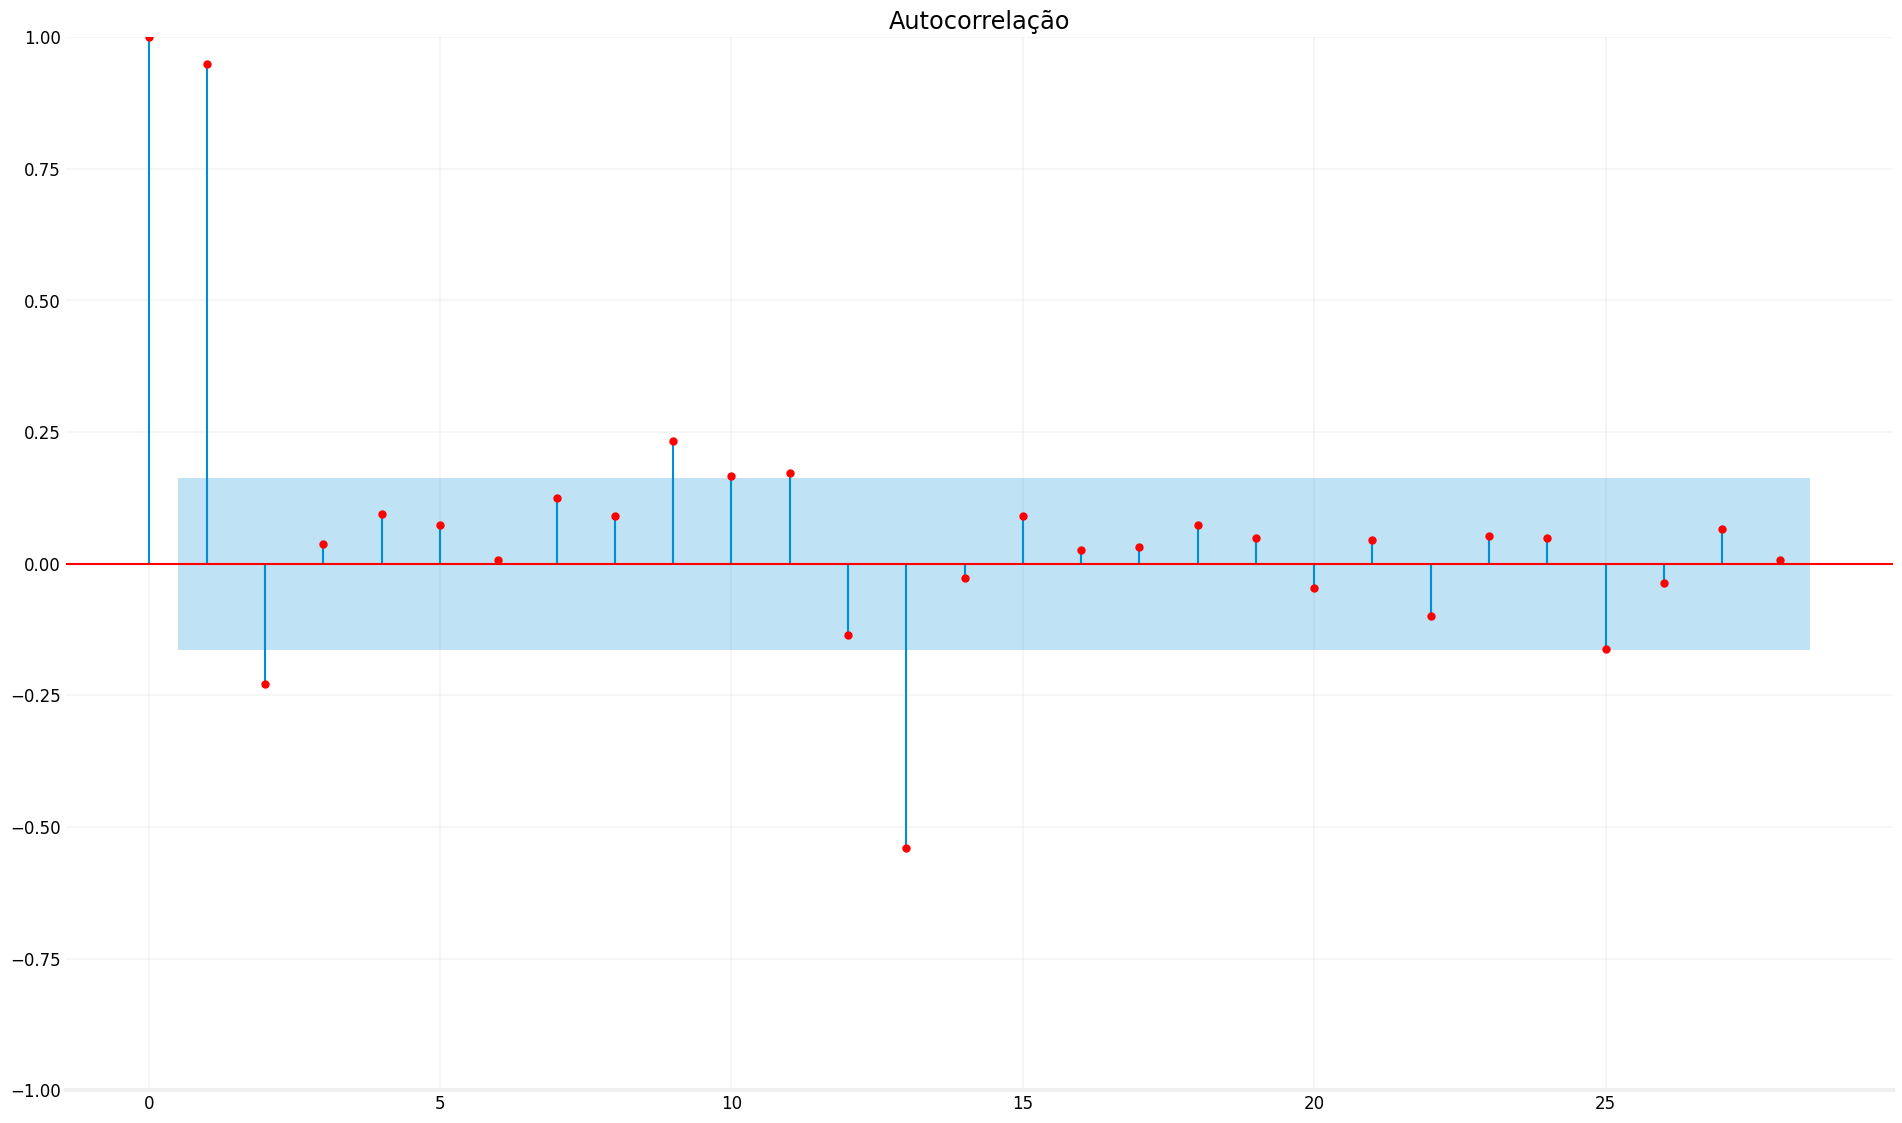

In [13]:
# Função de correlação parcial para série temporal

plot_pacf(MinhaSerieTemporal[MinhaSerieTemporal.columns[0]],  lags=28, title = "Autocorrelação", color="red");

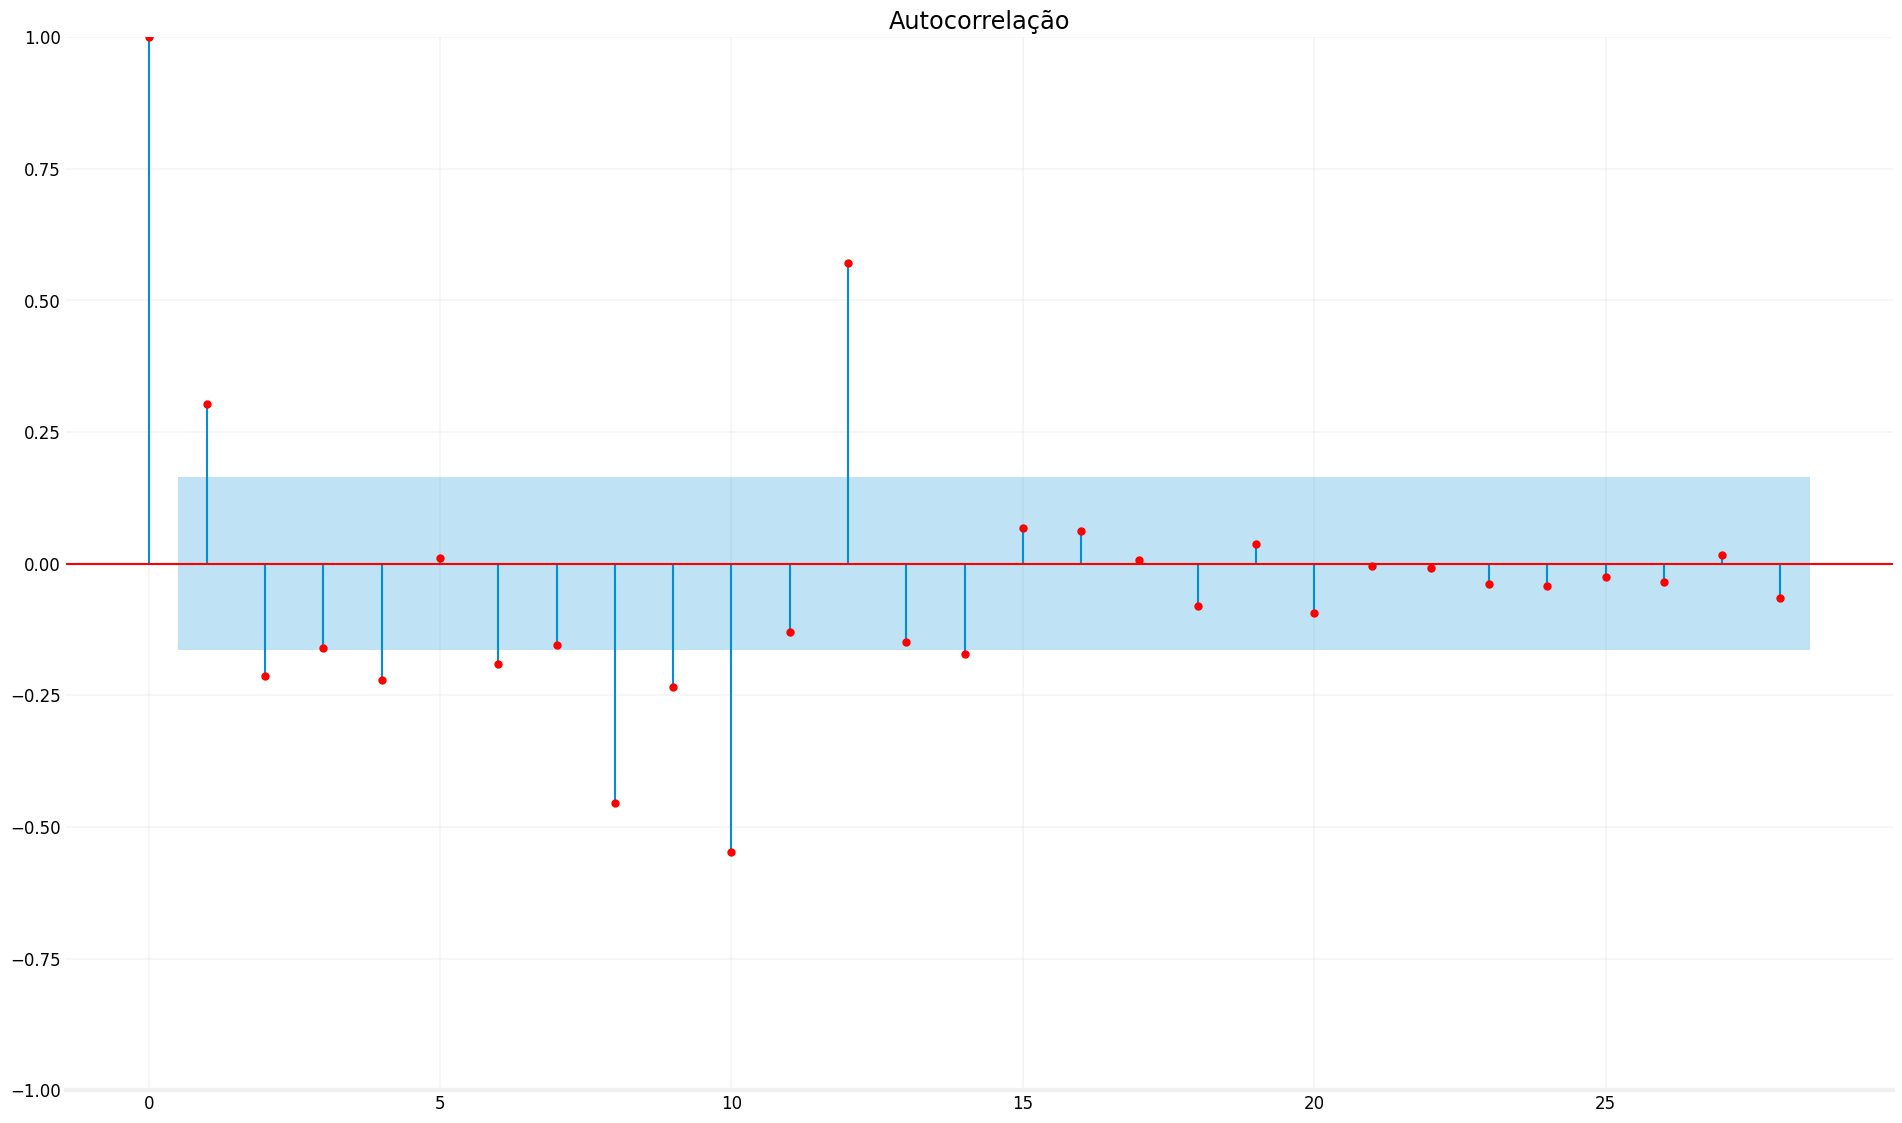

In [14]:
# Função de correlação parcial para série das diferenças finitas da ordem escolhida acima

plot_pacf(np.diff(MinhaSerieTemporal[MinhaSerieTemporal.columns[0]], n = OrdemDif),  lags=28, title = "Autocorrelação", color="red");

#### Separação das bases de treino e teste

In [15]:
# Definição da proporção de dados para compor a base de teste

PercentualTeste = 10

In [16]:
# Cálculo do tamanho do período de testes
PeriodoTeste = PercentualTeste * len(MinhaSerieTemporal) // 100

# Definição do DataFrame de treino
TreinoDF = pd.DataFrame(index = MinhaSerieTemporal[:-PeriodoTeste].index)
TreinoDF['Treino'] = MinhaSerieTemporal[:-PeriodoTeste][MinhaSerieTemporal.columns[0]]

# Definição do DataFrame de teste
TesteDF  = pd.DataFrame(index = MinhaSerieTemporal[-PeriodoTeste:].index)
TesteDF['Teste'] = MinhaSerieTemporal[-PeriodoTeste:][MinhaSerieTemporal.columns[0]]

<Axes: xlabel='Mês'>

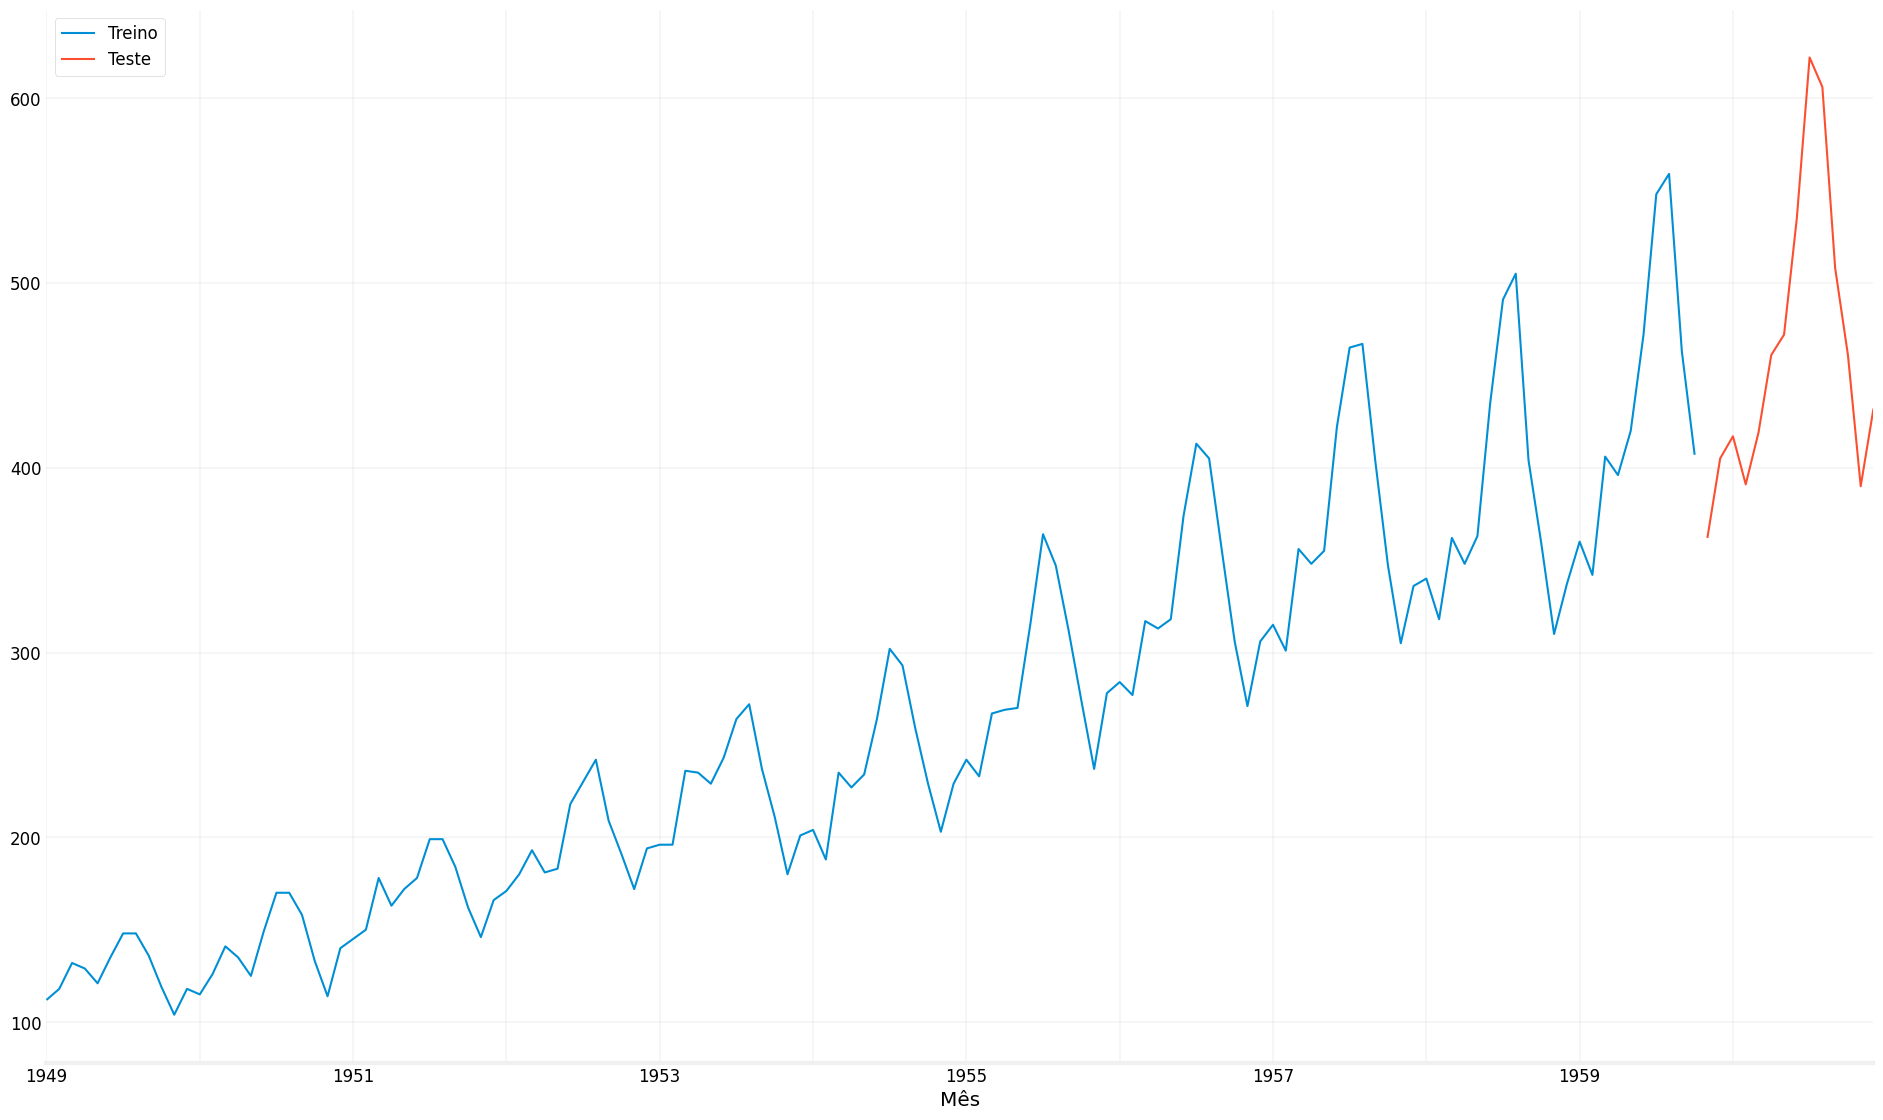

In [17]:
# Exibe a série temporal, com a separação da base de dados

pd.concat([TreinoDF,TesteDF], axis = 1).plot()

#### Previsão pelo modelo ARMA

In [18]:
# Definição da ordem de autorregressividade

p = 12

# Definição da ordem da média móvel

q = 12

In [19]:
model = SARIMAX(TreinoDF, order=(p,0,q))
model_fit = model.fit(disp=False)

print(model_fit.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                 Treino   No. Observations:                  130
Model:             SARIMAX(12, 0, 12)   Log Likelihood                -497.660
Date:                Fri, 17 Oct 2025   AIC                           1045.321
Time:                        15:22:00   BIC                           1117.009
Sample:                    01-01-1949   HQIC                          1074.450
                         - 10-01-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0810      0.155      0.523      0.601      -0.223       0.385
ar.L2         -0.0728      0.160     -0.456      0.648      -0.386       0.240
ar.L3          0.0677      0.162      0.418      0.6

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [20]:
PrevisoesSARIMAX = model_fit.get_prediction(len(TreinoDF), len(TreinoDF) + len(TesteDF) - 1).predicted_mean

In [21]:
# Montagem do DataFrame de previsão

PrevisoesDF  = pd.DataFrame(index = MinhaSerieTemporal[-PeriodoTeste:].index)
PrevisoesDF['Previsão'] = PrevisoesSARIMAX

<Axes: xlabel='Mês'>

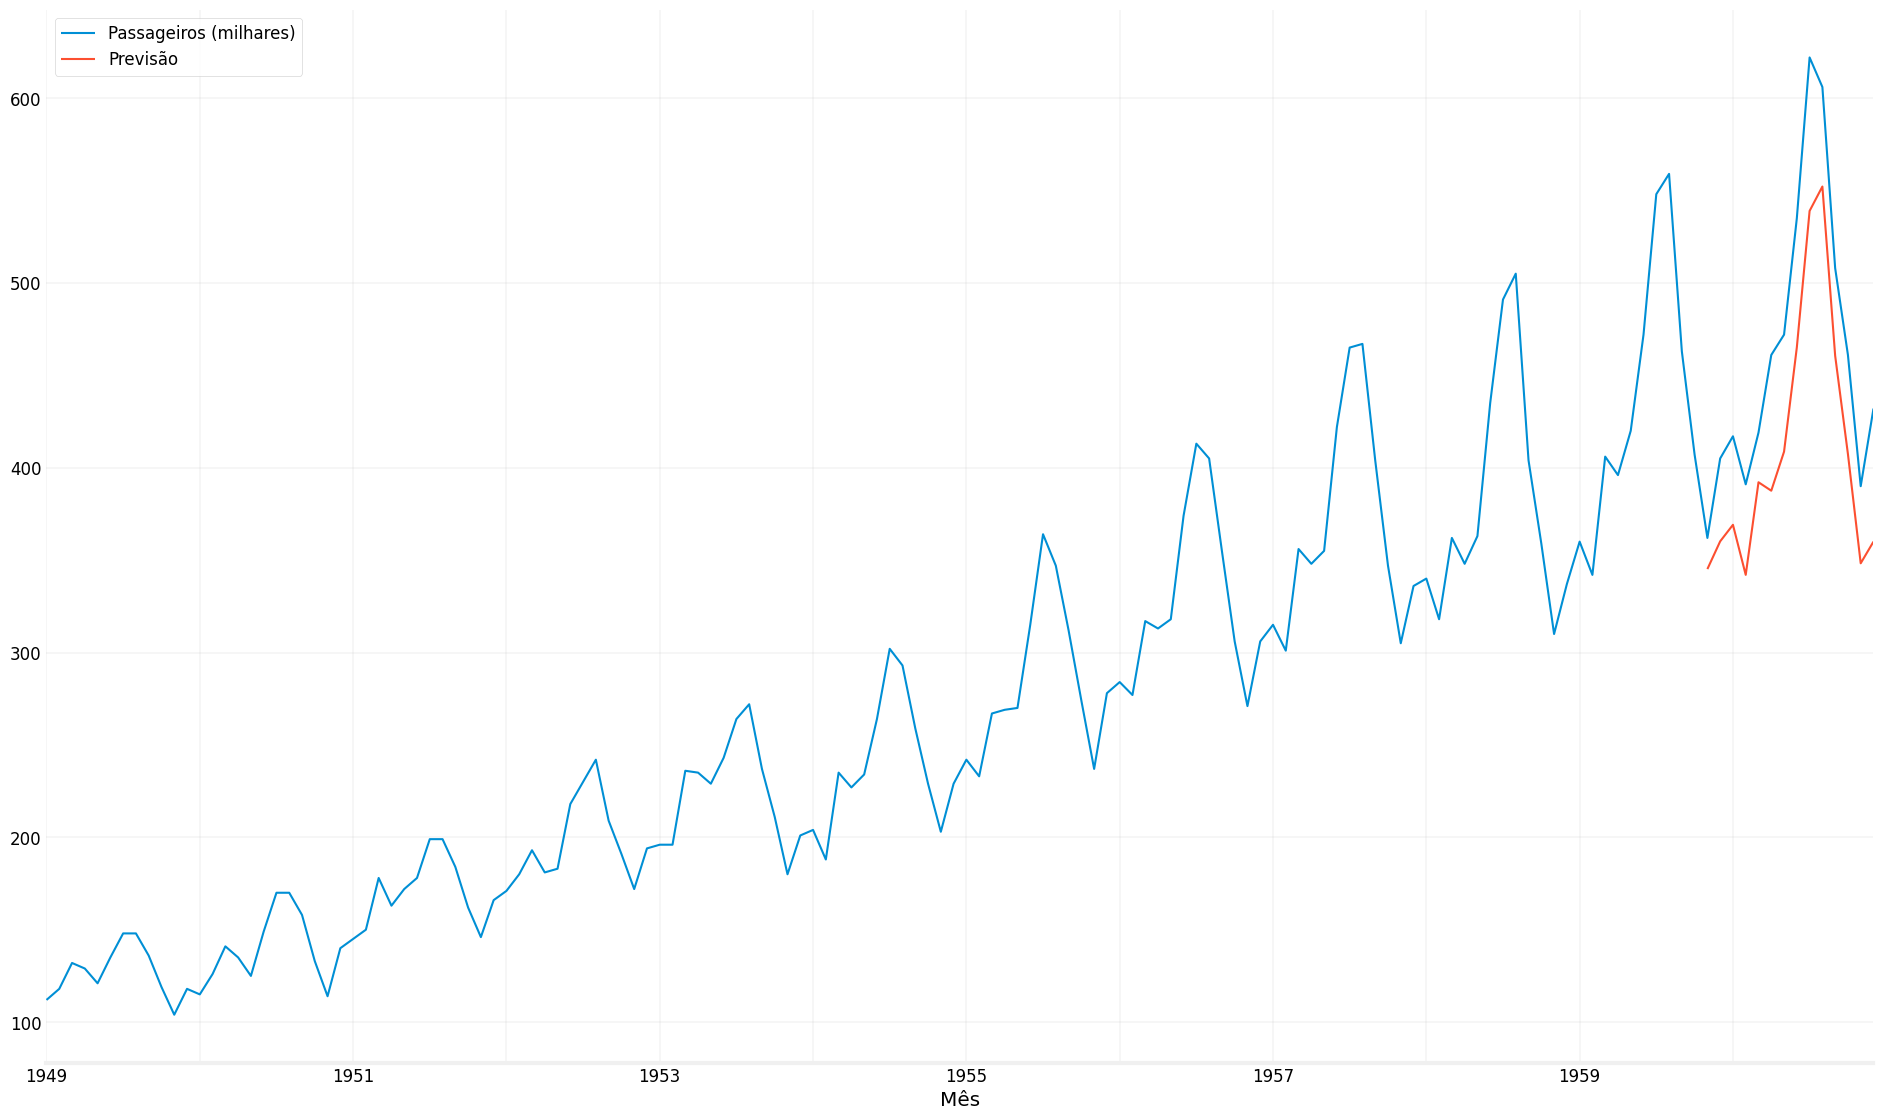

In [22]:
# Exibe a série temporal, com a separação da base de dados

pd.concat([MinhaSerieTemporal,PrevisoesDF], axis = 1).plot()

#### Medidas de erro

In [23]:
# Cáluclo do vetor de erros

Erros = PrevisoesDF['Previsão'].values - TesteDF['Teste'].values
Erros

array([-16.85017192, -44.846127  , -47.89703386, -48.98969616,
       -26.87180798, -73.44649142, -63.30913413, -69.91479192,
       -83.05319666, -53.85090629, -47.41008781, -53.63365995,
       -41.72502468, -71.99550962])

In [24]:
# Cálculo do erro médio
ErroMedio = Erros.mean()

In [25]:
# Cálculo do erro absoluto médio
MAE = np.abs(Erros).mean()

In [26]:
# Cálculo da raiz do erro quadrático médio
RMSE = np.sqrt((Erros**2).mean())

In [27]:
# Cálculo dos erros relativos
ErrosRelativos = Erros / TesteDF['Teste'].values
ErrosRelativos

array([-0.04654744, -0.11073118, -0.11486099, -0.12529334, -0.06413319,
       -0.15931994, -0.13412952, -0.13068185, -0.13352604, -0.08886288,
       -0.09332694, -0.116342  , -0.10698724, -0.16665627])

In [28]:
# Cálculo do erro percentual absoluto médio
MAPE = np.abs(ErrosRelativos).mean()

In [29]:
print(f'Medidas de erro de previsão')
print()
print(f'Modelo de previsão: ARMA({p},{q})')
print()
print(f'Erro médio: {ErroMedio: 2.1f}')
print(f'MAE:        {MAE: 2.1f}')
print(f'RMSE:       {RMSE: 2.1f}')
print(f'MAPE:       {MAPE*100: 2.1f} %')

Medidas de erro de previsão

Modelo de previsão: ARMA(12,12)

Erro médio: -53.1
MAE:         53.1
RMSE:        56.0
MAPE:        11.4 %


Conclusão

Com base nas métricas de erro calculadas, aqui está um resumo do desempenho do modelo ARMA(12,12) no conjunto de teste:

- Erro Médio (-53.1): Em média, as previsões do modelo são cerca de 53.1 mil passageiros inferiores aos valores reais. Isso indica uma tendência a subestimar o número de passageiros.
- MAE (53.1): A diferença absoluta média entre as previsões e os valores reais é de aproximadamente 53.1 mil passageiros. Isso dá uma ideia da magnitude típica dos erros, independentemente da direção.
- RMSE (56.0): A raiz quadrada do erro quadrático médio é de aproximadamente 56.0 mil passageiros. Essa métrica penaliza erros maiores mais severamente do que os menores, sugerindo que pode haver alguns desvios maiores nas previsões.
- MAPE (11.4%): O erro percentual absoluto médio é de 11.4%. Isso significa que, em média, as previsões estão cerca de 11.4% distantes do valor real. Esta é uma boa medida relativa da precisão do modelo.

Em conclusão, o modelo ARMA(12,12) fornece previsões que estão, em média, cerca de 11.4% distantes dos valores reais. O erro médio negativo sugere uma subestimação sistemática.

